https://blog.csdn.net/LY_ysys629/article/details/54428838

## 1. Series和DataFrame的简单数学计算

### （1）Series数学运算

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

s1 = Series([1,2,3],index = ['A','B','C'])
s2 = Series([4,5,6,7],index = ['B','C','D','E'])
#print(s1)
#print(s2)
s1+s2  #结果是对应index的对应位置相加。但是比如说s1中的A和s2相加，因为s2中没有数，即为NaN,而NaN和任何数相加都是NaN。同理s2中的D和E

A    NaN
B    6.0
C    8.0
D    NaN
E    NaN
dtype: float64

### （2）DataFrame的数学运算

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame(np.arange(4).reshape(2,2),index = ['A','B'],columns=['BJ','SH'])
df2 = DataFrame(np.arange(9).reshape(3,3),index = ['A','B','C'],columns = ['BJ','SH','GZ'])

In [3]:
df1

,BJ,SH
A,0,1
B,2,3


In [4]:
df2

,BJ,SH,GZ
A,0,1,2
B,3,4,5
C,6,7,8


In [5]:
df1 + df2  #加法和series一样，对应行列相加，如果没有值直接就是NaN

,BJ,GZ,SH
A,0.0,NaN,2.0
B,5.0,NaN,7.0
C,NaN,NaN,NaN


### （3）dataframe内置运算

In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df3 = DataFrame([[1,2,3],[4,5,np.nan],[7,8,9]],index = ['A','B','C'], columns = ['c1','c2','c3' ])
df3

,c1,c2,c3
A,1,2,3.0
B,4,5,NaN
C,7,8,9.0


In [7]:
df3.sum()  #将列相加，就算有NaN，那么直接忽略NaN，别的数继续相加

c1    12.0
c2    15.0
c3    12.0
dtype: float64

In [8]:
df3.sum(axis = 1) #行求和，就算有NaN，那么直接忽略NaN，别的数继续相加

A     6.0
B     9.0
C    24.0
dtype: float64

In [9]:
df3.min()   #返回的值是一个series，相当于我在每一列里面找最小值

c1    1.0
c2    2.0
c3    3.0
dtype: float64

In [10]:
df3.min(axis = 1) #返回的值是一个series，相当于我在每一行里面找最小值

A    1.0
B    4.0
C    7.0
dtype: float64

In [11]:
df3.max()   #返回的值是一个series，相当于我在每一列里面找最大值

c1    7.0
c2    8.0
c3    9.0
dtype: float64

In [12]:
df3.max(axis = 1) #返回的值是一个series，相当于我在每一行里面找最大值

A    3.0
B    5.0
C    9.0
dtype: float64

In [14]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df3 = DataFrame([[1,2,3],[4,5,np.nan],[7,8,9]],index = ['A','B','C'], columns = ['c1','c2','c3' ])
df3

,c1,c2,c3
A,1,2,3.0
B,4,5,NaN
C,7,8,9.0


In [15]:
df3.describe()  
#这是看dataframe里面的具体运算内容的，我们可以看到c1和c2都是3，因为有三个数，而c3是2，因为有两个数。另一个为NaN.mean就是平均值

,c1,c2,c3
count,3.0,3.0,2.000000
mean,4.0,5.0,6.000000
std,3.0,3.0,4.242641
min,1.0,2.0,3.000000
25%,2.5,3.5,4.500000
50%,4.0,5.0,6.000000
75%,5.5,6.5,7.500000
max,7.0,8.0,9.000000


## 2. Series和DataFrame的排序

### （1）Series排序

In [16]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

s1 = Series(np.random.randn(10))  #随机创建一个长度为10的series
s1

0    0.856608
1    0.203228
2    0.765521
3    0.818185
4    1.339811
5    0.495491
6    0.076522
7    1.501154
8    1.865696
9    0.149115
dtype: float64

我们知道series是通过values和index组成，所以我们可以分别通过s1.value和s1.index去查看value以及index

所以对series的排序也应该有两种方式，一种是按照index一种是按照value排序

#### 按照value排序

In [17]:
s2 = s1.sort_values()#那么s1中的value就会从小到大进行排序->升序
s2

6    0.076522
9    0.149115
1    0.203228
5    0.495491
2    0.765521
3    0.818185
0    0.856608
4    1.339811
7    1.501154
8    1.865696
dtype: float64

In [18]:
s3 = s1.sort_values(ascending = False)  ##那么s1中的value就会从大到小进行排序->降序
s3

8    1.865696
7    1.501154
4    1.339811
0    0.856608
3    0.818185
2    0.765521
5    0.495491
1    0.203228
9    0.149115
6    0.076522
dtype: float64

#### 按照index排序

In [19]:
s2 = s1.sort_values()
s4 = s2.sort_index()     #那么就会把原本乱掉的index重新进行排序
s4

0    0.856608
1    0.203228
2    0.765521
3    0.818185
4    1.339811
5    0.495491
6    0.076522
7    1.501154
8    1.865696
9    0.149115
dtype: float64

### （2）DataFrame的排序
#### 抽出A列然后对其进行排序

In [20]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame(np.random.randn(40).reshape(8,5),columns = ['A','B','C','D','E'])  #我给columns进行定制就是为了之后把index和columns给区分开
df1

,A,B,C,D,E
0,-0.818464,-0.111878,-0.013144,-0.417519,-0.166161
1,0.264770,-0.385661,0.710482,-1.147388,-0.033945
2,0.811672,0.186787,-0.768931,1.076250,0.277912
3,-0.274090,-0.458986,-1.107956,-0.154068,0.444100
4,-0.609927,-1.248426,-0.533963,1.019579,0.358369
5,-1.821292,-1.048498,1.827877,-0.362790,-0.415561
6,-0.098698,0.265138,0.548137,-0.186303,0.583882
7,-0.072302,-0.294345,-0.587500,0.957652,0.107126


In [21]:
#我们对dataframe进行排序可以对column的value进行排序也可以对index进行排序
#对columns：dataframe有多个columns，所以我们要指定按照哪个column来排序
df2 = df1['A'].sort_values() #我们只抽出A列然后对其进行排序
df2

5   -1.821292
0   -0.818464
4   -0.609927
3   -0.274090
6   -0.098698
7   -0.072302
1    0.264770
2    0.811672
Name: A, dtype: float64

#### 保留所有数据，对A进行排序

In [22]:
df3 = df1.sort_values('A')  #保留原有的所有数据，但是按照A进行升序排序
df3

,A,B,C,D,E
5,-1.821292,-1.048498,1.827877,-0.362790,-0.415561
0,-0.818464,-0.111878,-0.013144,-0.417519,-0.166161
4,-0.609927,-1.248426,-0.533963,1.019579,0.358369
3,-0.274090,-0.458986,-1.107956,-0.154068,0.444100
6,-0.098698,0.265138,0.548137,-0.186303,0.583882
7,-0.072302,-0.294345,-0.587500,0.957652,0.107126
1,0.264770,-0.385661,0.710482,-1.147388,-0.033945
2,0.811672,0.186787,-0.768931,1.076250,0.277912


In [23]:
df3 = df1.sort_values('A',ascending = False)  #保留原有的所有数据，但是按照A进行降序排序
df3
#一定要明白，dataframe是不可能做到所有列同时进行排序的，所以一定要指定列名

,A,B,C,D,E
2,0.811672,0.186787,-0.768931,1.076250,0.277912
1,0.264770,-0.385661,0.710482,-1.147388,-0.033945
7,-0.072302,-0.294345,-0.587500,0.957652,0.107126
6,-0.098698,0.265138,0.548137,-0.186303,0.583882
3,-0.274090,-0.458986,-1.107956,-0.154068,0.444100
4,-0.609927,-1.248426,-0.533963,1.019579,0.358369
0,-0.818464,-0.111878,-0.013144,-0.417519,-0.166161
5,-1.821292,-1.048498,1.827877,-0.362790,-0.415561


#### 对index排序

In [24]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame(np.random.randn(40).reshape(8,5),columns = ['A','B','C','D','E'])
df1

,A,B,C,D,E
0,-0.384226,-1.974566,-0.242067,-0.694408,1.543009
1,-0.041799,-0.737306,-1.503209,-1.246958,-0.562092
2,0.867008,-0.068559,-0.667136,0.297618,1.507010
3,-1.813846,-0.216992,0.164215,1.452437,0.633240
4,0.004875,-1.119340,0.517003,-0.825030,-0.401012
5,-0.999058,0.022584,-0.105766,0.306589,-0.719242
6,-0.703124,-0.389476,1.070888,0.463628,0.458730
7,-0.447510,0.065742,-1.144663,-0.117750,0.514332


In [25]:
df3 = df1.sort_values('A') 
df3

,A,B,C,D,E
3,-1.813846,-0.216992,0.164215,1.452437,0.633240
5,-0.999058,0.022584,-0.105766,0.306589,-0.719242
6,-0.703124,-0.389476,1.070888,0.463628,0.458730
7,-0.447510,0.065742,-1.144663,-0.117750,0.514332
0,-0.384226,-1.974566,-0.242067,-0.694408,1.543009
1,-0.041799,-0.737306,-1.503209,-1.246958,-0.562092
4,0.004875,-1.119340,0.517003,-0.825030,-0.401012
2,0.867008,-0.068559,-0.667136,0.297618,1.507010


In [26]:
df4 = df3.sort_index()
df4

,A,B,C,D,E
0,-0.384226,-1.974566,-0.242067,-0.694408,1.543009
1,-0.041799,-0.737306,-1.503209,-1.246958,-0.562092
2,0.867008,-0.068559,-0.667136,0.297618,1.507010
3,-1.813846,-0.216992,0.164215,1.452437,0.633240
4,0.004875,-1.119340,0.517003,-0.825030,-0.401012
5,-0.999058,0.022584,-0.105766,0.306589,-0.719242
6,-0.703124,-0.389476,1.070888,0.463628,0.458730
7,-0.447510,0.065742,-1.144663,-0.117750,0.514332


## 3. 重命名Dataframe的index

### （1）直接用Series给index赋值更改原本的index的name

In [27]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df1 = DataFrame(np.arange(9).reshape(3,3),index = ['BJ','SH','GZ'], columns = ['A','B','C'])
df1

,A,B,C
BJ,0,1,2
SH,3,4,5
GZ,6,7,8


In [28]:
#接下来我们如果更改index和column的name
#直接用series给index赋值更改原本index的name
df1.index = Series(['bj','sh','gz'])
df1
#df1.value = Series(['a','b','c'])  #但是注意这里如果直接用series改value的值就会报错Pandas doesn't allow columns to be created via a new attribute name
#print(df1)

,A,B,C
bj,0,1,2
sh,3,4,5
gz,6,7,8


### （2）用map来更改原本的index的name来批量更改index的值

In [29]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df1 = DataFrame(np.arange(9).reshape(3,3),index = ['BJ','SH','GZ'], columns = ['A','B','C'])
df1

,A,B,C
BJ,0,1,2
SH,3,4,5
GZ,6,7,8


In [30]:
df1.index.map(str.upper)  
#通过str.upper把index全部变为小写的，但是并不改变原有的df1，因为通过map只是产生一个新的index而已，对原来的值没有影响

Index(['BJ', 'SH', 'GZ'], dtype='object')

In [31]:
df1

,A,B,C
BJ,0,1,2
SH,3,4,5
GZ,6,7,8


In [32]:
#如果我们想要通过map批量修改index值后对原dataframe有影响那么我们可以：
df1.index = df1.index.map(str.upper)
df1

,A,B,C
BJ,0,1,2
SH,3,4,5
GZ,6,7,8


### （3）通过rename()来修改index的name

In [33]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df1 = DataFrame(np.arange(9).reshape(3,3),index = ['BJ','SH','GZ'], columns = ['A','B','C'])
df1

,A,B,C
BJ,0,1,2
SH,3,4,5
GZ,6,7,8


In [34]:
df1 = df1.rename(index = str.lower,columns = str.lower)  #str.lower将index和column变成小写
df1  #这样子行列都变成了小写

,a,b,c
bj,0,1,2
sh,3,4,5
gz,6,7,8


### （4）通过传入一个字典来进行更改

In [35]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df1 = DataFrame(np.arange(9).reshape(3,3),index = ['BJ','SH','GZ'], columns = ['A','B','C'])
df1

,A,B,C
BJ,0,1,2
SH,3,4,5
GZ,6,7,8


In [36]:
df1 = df1.rename(index = {'BJ':'Beijing'}, columns = {'A':'aaa'})  #这里的意思就是把原本的BJ变成Beijing，把原本的A变成aaa
df1

,aaa,B,C
Beijing,0,1,2
SH,3,4,5
GZ,6,7,8


### （5）map函数

In [37]:
#我们现在有一个list1
list1 = [1,2,3,4]  #我们想把list1转换成list2 = ['1','2','3','4']
#通过for循环，找list1里面的每个元素然后变成string
list = []
for i in list1:
    i = str(i)
    list.append(i)
print(list)

['1', '2', '3', '4']


In [38]:
list1 = [1,2,3,4]
#列表解析，转变函数
print([str(x) for x in list1])

['1', '2', '3', '4']


In [43]:
list1 = [1,2,3,4]
#通过map函数，转变函数
list(map(str,list1))  #在list1把每个value都str，然后再把得到的结果list

TypeError: 'list' object is not callable

### （6）我们想写一个自己的map函数

In [44]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df1 = DataFrame(np.arange(9).reshape(3,3),index = ['BJ','SH','GZ'], columns = ['A','B','C'])

df1

,A,B,C
BJ,0,1,2
SH,3,4,5
GZ,6,7,8


In [45]:
def test_map(x):
    #函数里面要改变x的值
    return x + '_ABC'
df1.index.map(test_map)

Index(['BJ_ABC', 'SH_ABC', 'GZ_ABC'], dtype='object')

In [46]:
df1.rename(index = test_map)

,A,B,C
BJ_ABC,0,1,2
SH_ABC,3,4,5
GZ_ABC,6,7,8


## 4. DataFrame的merge操作

### （1）Merge初尝试

In [47]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df1 = DataFrame({'key':['X','Y','Z'],'data_set_1':[1,2,3]})
df1

,key,data_set_1
0,X,1
1,Y,2
2,Z,3


In [48]:
df2 = DataFrame({'key':['A','B','C'],'data_set_2':[4,5,6]})
df2

,key,data_set_2
0,A,4
1,B,5
2,C,6


In [49]:
#将df1和df2进行一个merge
pd.merge(df1,df2)  #结果会是空，因为通过这种方式去merge，那么他们首先会去找column名字相同的

,key,data_set_1,data_set_2


确保两个都有同一个name的column，然后还要确保其中的一个值是一样的才能进行merge

In [50]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame({'key':['X','Y','Z'],'data_set_1':[1,2,3]})
df1

,key,data_set_1
0,X,1
1,Y,2
2,Z,3


In [51]:
df2 = DataFrame({'key':['X','B','C'],'data_set_2':[4,5,6]})
df2

,key,data_set_2
0,X,4
1,B,5
2,C,6


In [52]:
pd.merge(df1,df2)  #这个时候就可以merge了，首先确保两个都有同一个name的column，然后还要确保其中的一个值是一样的才能进行merge

,key,data_set_1,data_set_2
0,X,1,4


df1里面的key列多加了一个X，那么对于df2可以索引到的X有两个，所以就两个分别merge

In [53]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame({'key':['X','Y','Z','X'],'data_set_1':[1,2,3,4]})
df1

,key,data_set_1
0,X,1
1,Y,2
2,Z,3
3,X,4


In [54]:
df2 = DataFrame({'key':['X','B','C'],'data_set_2':[4,5,6]})
df2

,key,data_set_2
0,X,4
1,B,5
2,C,6


In [55]:
pd.merge(df1,df2)   #我df1里面的key列多加了一个X，那么对于df2可以索引到的X有两个，所以就两个分别merge

,key,data_set_1,data_set_2
0,X,1,4
1,X,4,4


### （2）merge()的第二个参数：on

In [56]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame({'key':['X','Y','Z','X'],'data_set_1':[1,2,3,4]})
df1

,key,data_set_1
0,X,1
1,Y,2
2,Z,3
3,X,4


In [57]:
df2 = DataFrame({'key':['X','B','C'],'data_set_2':[4,5,6]})
df2

,key,data_set_2
0,X,4
1,B,5
2,C,6


In [58]:
pd.merge(df1,df2,on = 'key')  #on=''就是按照哪个column去merge

,key,data_set_1,data_set_2
0,X,1,4
1,X,4,4


### （3）merge()的第三个参数：how

In [59]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame({'key':['X','Y','Z','X'],'data_set_1':[1,2,3,4]})
df1

,key,data_set_1
0,X,1
1,Y,2
2,Z,3
3,X,4


In [60]:
df2 = DataFrame({'key':['X','B','C'],'data_set_2':[4,5,6]})
df2

,key,data_set_2
0,X,4
1,B,5
2,C,6


how=left,right,outer,inner,默认inner。inner就会使用intersection of keys from both frames。就会使用两边都有的key。相当于取交集

In [61]:
pd.merge(df1,df2,on = 'key',how ='inner')

,key,data_set_1,data_set_2
0,X,1,4
1,X,4,4


In [62]:
pd.merge(df1,df2,on = 'key',how ='left') #left就是df1,也就是说保留df1所有的column和row，然后df2和它进行匹配和补全。

,key,data_set_1,data_set_2
0,X,1,4.0
1,Y,2,NaN
2,Z,3,NaN
3,X,4,4.0


In [63]:
pd.merge(df1,df2,on = 'key',how ='right') #right就是df2，也就是保留df2所有的column和row，然后df1和它进行匹配和补全。

,key,data_set_1,data_set_2
0,X,1.0,4
1,X,4.0,4
2,B,NaN,5
3,C,NaN,6


In [64]:
pd.merge(df1,df2,on = 'key',how ='outer') #相当于让df1和df2做一个并集，保留所有的column里面的value然后两边相应做一个补全

,key,data_set_1,data_set_2
0,X,1.0,4.0
1,X,4.0,4.0
2,Y,2.0,NaN
3,Z,3.0,NaN
4,B,NaN,5.0
5,C,NaN,6.0


## 5. Concatenate和Combine

### （1）Concatenate  连接串联

#### 在array里面实现concatenate

In [65]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#在array里面实现concatenate
arr1 = np.arange(9).reshape(3,3)
arr1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [66]:
arr2 = np.arange(9).reshape(3,3)
arr2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [67]:
s = np.concatenate([arr1,arr2])
s  #结果会生成一个6 x 3的矩阵，然后相当于直接把arr2连接到arr1下面

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [68]:
s = np.concatenate([arr1,arr2],axis = 1)
s  #axis = 1的时候相当于arr2连接到arr1的右边

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

#### 在series里面实现concatenate

In [69]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

s1 = Series([1,2,3],index = ['X','Y','Z'])
s1

X    1
Y    2
Z    3
dtype: int64

In [70]:
s2 = Series([4,5], index = ['A','B'])
s2

A    4
B    5
dtype: int64

In [71]:
s = pd.concat([s1,s2])
s #结果相当于把s1给连接到s2的下面

X    1
Y    2
Z    3
A    4
B    5
dtype: int64

In [72]:
s = pd.concat([s1,s2], axis = 1)  
s   #相当于生成一个新的dataframe，这其实也是相当于把s2连接到s1的左边，但是我们要知道series里面的index是不同的，所以不能再像array那样子直接连接，而是生成一个新的dataframe，他们保留彼此原本的index，然后没有的数直接填NaN

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1
A,NaN,4.0
B,NaN,5.0
X,1.0,NaN
Y,2.0,NaN
Z,3.0,NaN


#### dataframe的concatenate

In [73]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame(np.random.randn(4,3), columns = ['X','Y','Z'])
df1

,X,Y,Z
0,0.557873,0.316636,-1.261986
1,-0.655210,-0.078574,0.136708
2,-2.605426,0.759614,-1.476746
3,0.798096,1.388053,0.695210


In [74]:
df2 = DataFrame(np.random.randn(3,3), columns = ['X','Y','A'])
df2

,X,Y,A
0,-0.573772,-0.734439,0.458179
1,0.987720,-0.665884,-2.558795
2,-0.931343,0.923990,1.586185


In [75]:
s = pd.concat([df1,df2])
s

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,X,Y,Z
0,NaN,0.557873,0.316636,-1.261986
1,NaN,-0.655210,-0.078574,0.136708
2,NaN,-2.605426,0.759614,-1.476746
3,NaN,0.798096,1.388053,0.695210
0,0.458179,-0.573772,-0.734439,NaN
1,-2.558795,0.987720,-0.665884,NaN
2,1.586185,-0.931343,0.923990,NaN


### （2）Combine  结合联合

#### series的combine

In [76]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

s1 = Series([2,np.nan,4,np.nan],index = ['A','B','C','D'])
s1

A    2.0
B    NaN
C    4.0
D    NaN
dtype: float64

In [77]:
s2 = Series([1,2,3,4], index = ['A','B','C','D'])
s2

A    1
B    2
C    3
D    4
dtype: int64

In [78]:
s = s1.combine_first(s2)  #用s2去填充s1,如果s1里哪一个value没有，那么就会根据index找s2里面的value去填充，生成一个新的series
s

A    2.0
B    2.0
C    4.0
D    4.0
dtype: float64

#### dataframe 的combine

In [79]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame({'X':[1,np.nan,3,np.nan],'Y':[5,np.nan,7,np.nan],'Z':[9,np.nan,11,np.nan]})
df1

,X,Y,Z
0,1.0,5.0,9.0
1,NaN,NaN,NaN
2,3.0,7.0,11.0
3,NaN,NaN,NaN


In [80]:
df2 = DataFrame({'Z':[np.nan,10,np.nan,12],'A':[1,2,3,4]})
df2

,Z,A
0,NaN,1
1,10.0,2
2,NaN,3
3,12.0,4


In [81]:
s = df1.combine_first(df2)  #我们想看的是Z，因为Z在df1和df2里面都有.相当于把df2的Z天冲到了df1中去了
s

,A,X,Y,Z
0,1.0,1.0,5.0,9.0
1,2.0,NaN,NaN,10.0
2,3.0,3.0,7.0,11.0
3,4.0,NaN,NaN,12.0


## 6. 通过apply进行数据预处理

### （1）导入数据

In [82]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('apply_demo.csv')

In [83]:
#了解数据属性
df.head()   #看一下有什么列

,time,data
0,1473411962,Symbol: APPL Seqno: 0 Price: 1623
1,1473411962,Symbol: APPL Seqno: 0 Price: 1623
2,1473411963,Symbol: APPL Seqno: 0 Price: 1623
3,1473411963,Symbol: APPL Seqno: 0 Price: 1623
4,1473411963,Symbol: APPL Seqno: 1 Price: 1649


In [84]:
df.size   #看一下有多少行

7978

### （2）apply -> 批量改变dataframe里的一列或者一行value

#### apply简单用法

In [85]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('apply_demo.csv')

s1 = Series(['a'] * 7979)
df['A'] = s1   #给原数据加一列A
df.head()

,time,data,A
0,1473411962,Symbol: APPL Seqno: 0 Price: 1623,a
1,1473411962,Symbol: APPL Seqno: 0 Price: 1623,a
2,1473411963,Symbol: APPL Seqno: 0 Price: 1623,a
3,1473411963,Symbol: APPL Seqno: 0 Price: 1623,a
4,1473411963,Symbol: APPL Seqno: 1 Price: 1649,a


In [86]:
#我们现在想要把A这一列的a都变成大写
df['A'] = df['A'].apply(str.upper)   #这里的意思其实就是，我们要对A这一列进行处理，处理的内容就是apply()括号里面的函数，然后再把得到的结果给A列做替换
df.head()

,time,data,A
0,1473411962,Symbol: APPL Seqno: 0 Price: 1623,A
1,1473411962,Symbol: APPL Seqno: 0 Price: 1623,A
2,1473411963,Symbol: APPL Seqno: 0 Price: 1623,A
3,1473411963,Symbol: APPL Seqno: 0 Price: 1623,A
4,1473411963,Symbol: APPL Seqno: 1 Price: 1649,A


#### apply再尝试
明确目的:我们可以看到data里面其实又symbol，seqno以及price，那么我们现在想要把这三部分split成三列

In [87]:
df['data'][0]   #我们首先看一看data第一行的内容

' Symbol: APPL Seqno: 0 Price: 1623'

In [88]:
#如果我们想要split
df['data'][0].split(' ')

['', 'Symbol:', 'APPL', 'Seqno:', '0', 'Price:', '1623']

In [89]:
#但是上面我们看到最开始还有一个空格，我们想要把它删掉
df['data'][0].strip().split(' ')  #strip()就是把首尾删掉

['Symbol:', 'APPL', 'Seqno:', '0', 'Price:', '1623']

In [90]:
l1 = df['data'][0].strip().split(' ')
l1[1],l1[3],l1[5]  #我们想把这的出的内容变成series赋给data列

('APPL', '0', '1623')

开始行动

In [91]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('apply_demo.csv')

#我们先创建一个函数
def foo(line):
    items = line.strip().split(' ')
    return Series([items[1],items[3],items[5]])

In [92]:
df_tmp = df['data'].apply(foo)   #对data这一列使用foo函数
df_tmp.head()

,0,1,2
0,APPL,0,1623
1,APPL,0,1623
2,APPL,0,1623
3,APPL,0,1623
4,APPL,1,1649


In [93]:
#因为我们之前学过rename，所以我们可以把这个dataframe的column名字改一下
df_tmp = df_tmp.rename(columns = {0:'Symbol', 1:'Seqno', 2:'Price'})
df_tmp.head()

,Symbol,Seqno,Price
0,APPL,0,1623
1,APPL,0,1623
2,APPL,0,1623
3,APPL,0,1623
4,APPL,1,1649


In [94]:
#然后我们现在既有已经split的df_tmp,也有原有的数据df
#那么我们准备把df_tmp直接加到df的后边，然后进行combine
df_new = df.combine_first(df_tmp)
df_new.head()

,Price,Seqno,Symbol,data,time
0,1623.0,0.0,APPL,Symbol: APPL Seqno: 0 Price: 1623,1473411962
1,1623.0,0.0,APPL,Symbol: APPL Seqno: 0 Price: 1623,1473411962
2,1623.0,0.0,APPL,Symbol: APPL Seqno: 0 Price: 1623,1473411963
3,1623.0,0.0,APPL,Symbol: APPL Seqno: 0 Price: 1623,1473411963
4,1649.0,1.0,APPL,Symbol: APPL Seqno: 1 Price: 1649,1473411963


In [95]:
#然后我们知道现在data这一列是没有用的，所以可以直接删除了
del df_new['data']
df_new.head()   #这就产生了一个新的dataframe

,Price,Seqno,Symbol,time
0,1623.0,0.0,APPL,1473411962
1,1623.0,0.0,APPL,1473411962
2,1623.0,0.0,APPL,1473411963
3,1623.0,0.0,APPL,1473411963
4,1649.0,1.0,APPL,1473411963


In [96]:
df_new.to_csv('demo_new.csv')

## 7. 通过去重进行数据清洗

### （1）查看是否重复

In [97]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('demo_new.csv')
df.head()

,Unnamed: 0,Price,Seqno,Symbol,time
0,0,1623.0,0.0,APPL,1473411962
1,1,1623.0,0.0,APPL,1473411962
2,2,1623.0,0.0,APPL,1473411963
3,3,1623.0,0.0,APPL,1473411963
4,4,1649.0,1.0,APPL,1473411963


In [98]:
#我们发现这里有一个unnamed，我们把这一列给删除
del df['Unnamed: 0']
df.head()

,Price,Seqno,Symbol,time
0,1623.0,0.0,APPL,1473411962
1,1623.0,0.0,APPL,1473411962
2,1623.0,0.0,APPL,1473411963
3,1623.0,0.0,APPL,1473411963
4,1649.0,1.0,APPL,1473411963


In [99]:
#接下来去重
#我们根据seqno去重,我们先来查看一下是否重复
df['Seqno'].duplicated().head()  #通过duplicated来查看是否有重复，False就是没有（凡第一次出现的都是false），至少第二次出现的就是True

0    False
1     True
2     True
3     True
4    False
Name: Seqno, dtype: bool

### （2）去重

In [100]:
s = df.drop_duplicates(['Seqno'])
s  #这个时候就已经去重了

,Price,Seqno,Symbol,time
0,1623.0,0.0,APPL,1473411962
4,1649.0,1.0,APPL,1473411963
8,1642.0,2.0,APPL,1473411964
12,1636.0,3.0,APPL,1473411965
16,1669.0,4.0,APPL,1473411966
...,...,...,...,...
3969,1641.0,995.0,APPL,1473412957
3973,1581.0,996.0,APPL,1473412958
3977,1674.0,997.0,APPL,1473412959
3981,1680.0,998.0,APPL,1473412960


### （3）drop_duplicates的第二个参数：keep

In [101]:
#第二个参数：keep，默认first，也就是保留第一个,也可以改成last也就是保留最后一个
s = df.drop_duplicates(['Seqno'],keep = 'last')
s

,Price,Seqno,Symbol,time
3,1623.0,0.0,APPL,1473411963
7,1649.0,1.0,APPL,1473411964
11,1642.0,2.0,APPL,1473411965
15,1636.0,3.0,APPL,1473411966
19,1669.0,4.0,APPL,1473411967
...,...,...,...,...
3972,1641.0,995.0,APPL,1473412958
3976,1581.0,996.0,APPL,1473412959
3980,1674.0,997.0,APPL,1473412960
3984,1680.0,998.0,APPL,1473412961


## 8. 时间序列操作基础

### （1）datetime初探

In [102]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#在python里面处理时间经常使用的一个库叫做datetime
from datetime import datetime
t1 = datetime(2009,10,20)  #这个参数分别对应年月日
t1

datetime.datetime(2009, 10, 20, 0, 0)

### （2）创建多个datetime

In [103]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#在python里面处理时间经常使用的一个库叫做datetime
from datetime import datetime

date_list = [datetime(2016,9,1),datetime(2016,9,10),datetime(2017,9,1),datetime(2017,9,20),datetime(2017,10,1)]
date_list

[datetime.datetime(2016, 9, 1, 0, 0),
 datetime.datetime(2016, 9, 10, 0, 0),
 datetime.datetime(2017, 9, 1, 0, 0),
 datetime.datetime(2017, 9, 20, 0, 0),
 datetime.datetime(2017, 10, 1, 0, 0)]

### （3）将date_list转变成series的index

In [104]:
#接着我想创建一个series，然后这个series的index就是我上面date_list的对象
s1 = Series(np.random.rand(5), index = date_list)
s1  #s1的index就是我们传入的date_list

2016-09-01    0.881325
2016-09-10    0.277103
2017-09-01    0.057413
2017-09-20    0.675068
2017-10-01    0.589854
dtype: float64

### （4）访问有datetime的series

In [105]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#在python里面处理时间经常使用的一个库叫做datetime
from datetime import datetime

date_list = [datetime(2016,9,1),datetime(2016,9,10),datetime(2017,9,1),datetime(2017,9,20),datetime(2017,10,1)]
date_list

[datetime.datetime(2016, 9, 1, 0, 0),
 datetime.datetime(2016, 9, 10, 0, 0),
 datetime.datetime(2017, 9, 1, 0, 0),
 datetime.datetime(2017, 9, 20, 0, 0),
 datetime.datetime(2017, 10, 1, 0, 0)]

In [106]:
s1 = Series(np.random.rand(5), index = date_list)
s1

2016-09-01    0.417119
2016-09-10    0.843123
2017-09-01    0.498249
2017-09-20    0.489096
2017-10-01    0.154076
dtype: float64

In [107]:
#通过index原有的序列
s1[1]   #也就是对应2016-09-10 的信息

0.8431229186189048

In [108]:
#通过datetime替换的index来访问
s1['2016-09-10']  #和s1[1]是一样的

0.8431229186189048

In [109]:
s1['20160910']

0.8431229186189048

In [110]:
s1['2016']  #返回所有2016年的数据

2016-09-01    0.417119
2016-09-10    0.843123
dtype: float64

In [111]:
s1['2017-09']  #返回所有2017年9月的数据

2017-09-01    0.498249
2017-09-20    0.489096
dtype: float64

### （5）批量产生一段时间内datetime的数据类型

date_range(start = None, end = None, periods = None) 这是date_range的前面三个参数，三个参数任选两个填写，另一个就可以推出来

date_range(start = None, end = None, periods = None， freq = 'D') freq第四个参数，即我们多长时间生成一个数据？几小时还是一天还是一个月？H,D,W,M

In [112]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#在python里面处理时间经常使用的一个库叫做datetime
from datetime import datetime

date_list_new = pd.date_range('2016-01-01', periods = 100, freq = 'W')  #按周来记
date_list_new
#即使日期设置的不是那么标准，但是大多数还是可以识别的
#这里的freq = 'W'是表示，日期的创建并不是基于天去创建，而是基于周去创建

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06', '2016-03-13', '2016-03-20',
               '2016-03-27', '2016-04-03', '2016-04-10', '2016-04-17',
               '2016-04-24', '2016-05-01', '2016-05-08', '2016-05-15',
               '2016-05-22', '2016-05-29', '2016-06-05', '2016-06-12',
               '2016-06-19', '2016-06-26', '2016-07-03', '2016-07-10',
               '2016-07-17', '2016-07-24', '2016-07-31', '2016-08-07',
               '2016-08-14', '2016-08-21', '2016-08-28', '2016-09-04',
               '2016-09-11', '2016-09-18', '2016-09-25', '2016-10-02',
               '2016-10-09', '2016-10-16', '2016-10-23', '2016-10-30',
               '2016-11-06', '2016-11-13', '2016-11-20', '2016-11-27',
               '2016-12-04', '2016-12-11', '2016-12-18', '2016-12-25',
               '2017-01-01', '2017-01-08', '2017-01-15', '2017-01-22',
      

In [113]:
s2 = Series(np.random.rand(100), index = date_list_new)  #我们可以将所生成的date_list_new转换成一个series
#在这里创建一个index，因为我们往往在创建日期时间的时候，时间是一个关键的索引
#这里index其实就是在说，把索引变成了时间
#最后结果发现,原本列表的第一列是以0-1开始的，而现在变成了纯日期
s2

2016-01-03    0.066320
2016-01-10    0.840320
2016-01-17    0.674213
2016-01-24    0.679658
2016-01-31    0.918727
                ...   
2017-10-29    0.804148
2017-11-05    0.862875
2017-11-12    0.768868
2017-11-19    0.029158
2017-11-26    0.580974
Freq: W-SUN, Length: 100, dtype: float64

### （6）时间戳
#### 何为时间戳

In [114]:
import pandas as pd
import numpy as np
#时间一直在流动，而我们要把时间做一个暂停
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2020, 1, 9, 15, 59, 21, 142492)

#### 规范化时间

In [115]:
import pandas as pd
import numpy as np

d = '2018/1/1'
f = pd.to_datetime(d)
f #2018-01-01 00:00:00 就会变成非常规范的时间，这个可以实现日期数据的统一格式化

Timestamp('2018-01-01 00:00:00')

In [116]:
f.month #那么就是从这个时间中提取月份

1

#### 时间戳索引

In [117]:
import pandas as pd
import numpy as np

e = ['2018/1/1','2018/1/5']
e2 = pd.to_datetime(e)
e2

DatetimeIndex(['2018-01-01', '2018-01-05'], dtype='datetime64[ns]', freq=None)

In [118]:
e2[0]

Timestamp('2018-01-01 00:00:00')

In [119]:
e2[1]

Timestamp('2018-01-05 00:00:00')

### （7）时间序列对象的简单展示

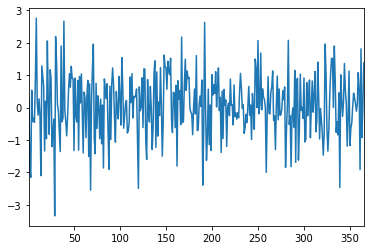

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
ts = pd.Series(np.random.randn(365), index = np.arange(1,366)) 
#我要随机生成365*1的矩阵，然后索引就是从1-366（不包括366）
ts.plot()
plt.show()

### （8）将date的年月日进行分解

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('sale.csv',parse_dates = ['time'])
df['year']=df['time'].dt.year
df['month']=df['time'].dt.month
df['day']=df['time'].dt.day
df

,ID,Sale,time,label,year,month,day
0,1,512,2018-01-01,A,2018,1,1
1,2,215,2018-01-02,B,2018,1,2
2,3,412,2018-01-03,C,2018,1,3
3,4,632,2018-01-04,D,2018,1,4
4,5,854,2018-01-05,A,2018,1,5
5,6,621,2018-01-06,D,2018,1,6
6,7,157,2018-01-07,C,2018,1,7
7,8,325,2018-01-08,B,2018,1,8
8,9,697,2018-01-09,A,2018,1,9
9,10,154,2018-01-10,C,2018,1,10


## 9. 时间序列数据的采样和画图

### （1）时间序列采样

#### 传统麻烦方法

In [123]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime

t_range = pd.date_range('2016-01-01', '2016-12-31')  
t_range

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [124]:
#对t_range进行采样
s1 = Series(np.random.randn(len(t_range)),index = t_range)
s1.head()

2016-01-01    0.168838
2016-01-02    0.638129
2016-01-03   -0.482600
2016-01-04    0.672541
2016-01-05    1.117877
Freq: D, dtype: float64

In [125]:
#这个时候默认是按照天采样，如果我们现在想要按照月份走，每个月一个数据
#如果一个月我们想要生成一个数据点，那么其实是可以求每个月的平均值的
s1['2016-01'].mean()  #通过这样的重复工作，我们可以算出12个月的平均值，然后再将这12个月的值生成一个新的series
#但是上面的方法太过麻烦

0.3123380722146502

#### resample采样

In [126]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime

t_range = pd.date_range('2016-01-01', '2016-12-31')  
t_range

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [127]:
s1 = Series(np.random.randn(len(t_range)),index = t_range)
#print(s1)
s1_month = s1.resample('M').mean()
s1_month  #那么这个时候就是按照月来采样的

2016-01-31    0.063961
2016-02-29    0.201981
2016-03-31    0.036393
2016-04-30   -0.043756
2016-05-31    0.139493
2016-06-30   -0.314834
2016-07-31   -0.395149
2016-08-31   -0.289946
2016-09-30    0.033081
2016-10-31    0.031909
2016-11-30    0.306573
2016-12-31   -0.003587
Freq: M, dtype: float64

#### 提高采样频率
我们还可以把采样频率提高，比如说现在s1是按照天的，但是我们想要改成按小时的，每天去采24个点

In [128]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime

t_range = pd.date_range('2016-01-01', '2016-12-31')  
t_range

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [129]:
s1 = Series(np.random.randn(len(t_range)),index = t_range)
s1

2016-01-01    0.532848
2016-01-02   -2.009708
2016-01-03   -0.124235
2016-01-04   -1.119099
2016-01-05   -0.233822
                ...   
2016-12-27   -1.595717
2016-12-28   -0.219512
2016-12-29    0.115538
2016-12-30    0.777279
2016-12-31    1.060830
Freq: D, Length: 366, dtype: float64

但是我们现在只有每天的采样，那么就提高采样频率，那么我们的数据不够，那么我们就要对数据去进行填充

In [130]:
s1_hour = s1.resample('H').ffill()  #ffill->forward fill
s1_hour.head()

2016-01-01 00:00:00    0.532848
2016-01-01 01:00:00    0.532848
2016-01-01 02:00:00    0.532848
2016-01-01 03:00:00    0.532848
2016-01-01 04:00:00    0.532848
Freq: H, dtype: float64

In [131]:
s1_hour = s1.resample('H').bfill()   #bfill -> back fill
s1_hour.head()

2016-01-01 00:00:00    0.532848
2016-01-01 01:00:00   -2.009708
2016-01-01 02:00:00   -2.009708
2016-01-01 03:00:00   -2.009708
2016-01-01 04:00:00   -2.009708
Freq: H, dtype: float64

### （2）时间序列画图
如何画图，时间序列数据非常适合画图。比如股票的曲线图

以股票数据为例

In [132]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
#构造一个时间序列数据
t_range = pd.date_range('2016-01-01','2016-12-31', freq = 'H')
stock_df = DataFrame(index = t_range)  #创建一个数据为空的dataframe先,没有数据，只有index
stock_df.head()

""
2016-01-01 00:00:00
2016-01-01 01:00:00
2016-01-01 02:00:00
2016-01-01 03:00:00
2016-01-01 04:00:00


In [133]:
#创建一个columns
stock_df['BABA'] = np.random.randint(80,160,len(t_range))  #生成随机数范围是80到160之间，长度就是刚刚的datetime的长度
stock_df['TENCENT'] = np.random.randint(30,60,len(t_range)) 
stock_df.head()
#现在我们就有两列数据，然后都是index为datetime的

,BABA,TENCENT
2016-01-01 00:00:00,157,52
2016-01-01 01:00:00,106,46
2016-01-01 02:00:00,117,39
2016-01-01 03:00:00,96,33
2016-01-01 04:00:00,118,57


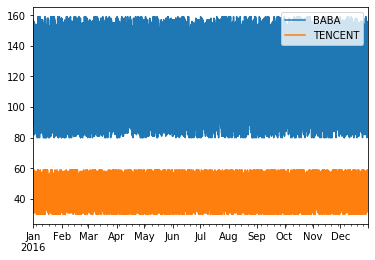

In [134]:
stock_df.plot()

In [135]:
#然后我们要显示图
import matplotlib.pyplot as plt
plt.show()  #但是这个图片没法看，是因为我们的datetime非常密集

In [136]:
#那么我们可以对datetime进行采样，改成每周一个点
weekly_df = DataFrame()
weekly_df['BABA'] = stock_df['BABA'].resample('W').mean()
weekly_df['TENCENT'] = stock_df['TENCENT'].resample('W').mean()
weekly_df.head()

,BABA,TENCENT
2016-01-03,121.305556,46.847222
2016-01-10,123.125000,43.928571
2016-01-17,118.684524,44.755952
2016-01-24,120.315476,44.750000
2016-01-31,116.625000,43.053571


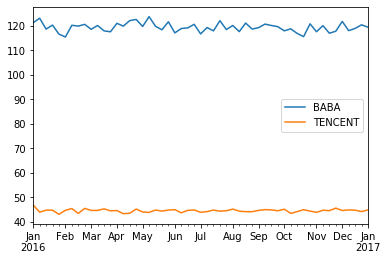

In [137]:
weekly_df.plot()
plt.show()

## 10. 数据分箱技术Binning

数据分箱技术是什么？

比如说我们买苹果，那么苹果直径有60mm的有80mm的有100mm，然后我们把它们分箱来装

其实就是分类


### （1）binning初探

In [139]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#我们拿的例子是考试分数
score_list = np.random.randint(25,100,size = 20) #产生一个满分为100，最低分为25分的20个value的list
score_list

array([64, 54, 80, 81, 35, 97, 88, 88, 56, 72, 34, 47, 82, 88, 77, 82, 93,
       45, 82, 31])

In [140]:
#然后我们想要把这个成绩进行分组、分箱
bins = [0,59,70,80,100]  #在这里相当于我们把0-59是一个段，59-70是一个段，70-80是一个段，80-100是一个段

In [141]:
#然后我们想看看我们的成绩落在这几个区间的个数
score_cat = pd.cut(score_list,bins)
score_cat

[(59, 70], (0, 59], (70, 80], (80, 100], (0, 59], ..., (80, 100], (80, 100], (0, 59], (80, 100], (0, 59]]
Length: 20
Categories (4, interval[int64]): [(0, 59] < (59, 70] < (70, 80] < (80, 100]]

In [142]:
pd.value_counts(score_cat)  #来算一算每个区间的个数

(80, 100]    9
(0, 59]      7
(70, 80]     3
(59, 70]     1
dtype: int64

### （2）dataframe的binning
而如果是dataframe，则可以对其中一个column进行category

In [143]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
score_list = np.random.randint(25,100,size = 20)
score_list

array([84, 68, 30, 90, 79, 26, 58, 83, 32, 56, 88, 60, 25, 32, 50, 56, 57,
       62, 60, 42])

In [144]:
bins = [0,59,70,80,100]

df = DataFrame()
df['score'] = score_list
df['student'] = [pd.util.testing.rands(3) for i in range(20)]  #rands()生成随机字符串
df

,score,student
0,84,ln6
1,68,Vdn
2,30,Z1P
3,90,cKR
4,79,lJt
5,26,Ti1
6,58,4cr
7,83,MIL
8,32,rrq
9,56,HeX


In [145]:
#那么我们其实这个时候就可以对score进行分区了，分区依据仍旧是上面的bins
df['Category'] = pd.cut(df['score'],bins)
df  #这个时候我们多出了一个column，这个column其实显示了score是属于哪个区间

,score,student,Category
0,84,ln6,"(80, 100]"
1,68,Vdn,"(59, 70]"
2,30,Z1P,"(0, 59]"
3,90,cKR,"(80, 100]"
4,79,lJt,"(70, 80]"
5,26,Ti1,"(0, 59]"
6,58,4cr,"(0, 59]"
7,83,MIL,"(80, 100]"
8,32,rrq,"(0, 59]"
9,56,HeX,"(0, 59]"


In [146]:
#但是这个时候我们还是不太清楚这个category代表什么，那么其实我们要给每一个分组一个小标签来便于区分
df['Category'] = pd.cut(df['score'],bins,labels = ['low','ok','good','great'])
df  #这个方式比较适合人类阅读

,score,student,Category
0,84,ln6,great
1,68,Vdn,ok
2,30,Z1P,low
3,90,cKR,great
4,79,lJt,good
5,26,Ti1,low
6,58,4cr,low
7,83,MIL,great
8,32,rrq,low
9,56,HeX,low


## 11. 数据分组技术GroupBy
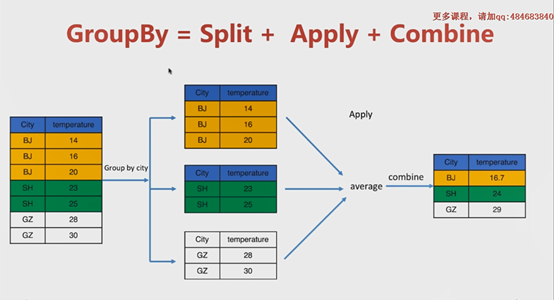

### （1）Group by 初探

In [148]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#和sql里面的group by基本一致
df = pd.read_csv('city_weather.csv')
df  #这就是我们原始的数据，然后我们要用group by对这个数据进行一些操作
#我们先选择city来做group by

,date,city,temperature,wind
0,03/01/2016,BJ,8,5
1,17/01/2016,BJ,12,2
2,31/01/2016,BJ,19,2
3,14/02/2016,BJ,-3,3
4,28/02/2016,BJ,19,2
5,13/03/2016,BJ,5,3
6,27/03/2016,SH,-4,4
7,10/04/2016,SH,19,3
8,24/04/2016,SH,20,3
9,08/05/2016,SH,17,3


In [149]:
g = df.groupby(df['city'])
g  #然后我们接下来对g进行操作

In [150]:
g.groups  #通过groupby之后返回几个group，然后还有每个group的index也告诉我们了

{'BJ': Int64Index([0, 1, 2, 3, 4, 5], dtype='int64'),
 'GZ': Int64Index([14, 15, 16, 17], dtype='int64'),
 'SH': Int64Index([6, 7, 8, 9, 10, 11, 12, 13], dtype='int64'),
 'SZ': Int64Index([18, 19], dtype='int64')}

In [151]:
df_bj = g.get_group('BJ')
df_bj     #相当于我们把city过滤了一下，挑出BJ的

,date,city,temperature,wind
0,03/01/2016,BJ,8,5
1,17/01/2016,BJ,12,2
2,31/01/2016,BJ,19,2
3,14/02/2016,BJ,-3,3
4,28/02/2016,BJ,19,2
5,13/03/2016,BJ,5,3


In [152]:
#然后我们可以对df_bj进行一些运算
df_bj.mean()  #既然我们可以对其中一个group求平均值，那么我们肯定也可以对g的每个group求平均值

temperature    10.000000
wind            2.833333
dtype: float64

### （2）对整个group By的数据进行运算

In [153]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('city_weather.csv')
df.head(10)

,date,city,temperature,wind
0,03/01/2016,BJ,8,5
1,17/01/2016,BJ,12,2
2,31/01/2016,BJ,19,2
3,14/02/2016,BJ,-3,3
4,28/02/2016,BJ,19,2
5,13/03/2016,BJ,5,3
6,27/03/2016,SH,-4,4
7,10/04/2016,SH,19,3
8,24/04/2016,SH,20,3
9,08/05/2016,SH,17,3


In [154]:
g = df.groupby(df['city'])

g.mean()

,temperature,wind
city,,
BJ,10.000,2.833333
GZ,8.750,4.000000
SH,4.625,3.625000
SZ,5.000,2.500000


In [155]:
g.min()

,date,temperature,wind
city,,,
BJ,03/01/2016,-3,2
GZ,14/08/2016,-1,2
SH,03/07/2016,-10,2
SZ,11/09/2016,-10,1


In [156]:
g.max()

,date,temperature,wind
city,,,
BJ,31/01/2016,19,5
GZ,31/07/2016,25,5
SH,27/03/2016,20,5
SZ,25/09/2016,20,4


### （3）group by之后的数据与list以及dictionary的转换

In [157]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('city_weather.csv')
df.head(10)

,date,city,temperature,wind
0,03/01/2016,BJ,8,5
1,17/01/2016,BJ,12,2
2,31/01/2016,BJ,19,2
3,14/02/2016,BJ,-3,3
4,28/02/2016,BJ,19,2
5,13/03/2016,BJ,5,3
6,27/03/2016,SH,-4,4
7,10/04/2016,SH,19,3
8,24/04/2016,SH,20,3
9,08/05/2016,SH,17,3


In [159]:
g = df.groupby(df['city'])

print(list(g))    #我们想把group by之后的内容转换成一个list

TypeError: 'list' object is not callable

In [160]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('city_weather.csv')
df.head(10)

,date,city,temperature,wind
0,03/01/2016,BJ,8,5
1,17/01/2016,BJ,12,2
2,31/01/2016,BJ,19,2
3,14/02/2016,BJ,-3,3
4,28/02/2016,BJ,19,2
5,13/03/2016,BJ,5,3
6,27/03/2016,SH,-4,4
7,10/04/2016,SH,19,3
8,24/04/2016,SH,20,3
9,08/05/2016,SH,17,3


In [161]:
g = df.groupby(df['city'])

dict(list(g)) #我们想把group by之后的内容转换成一个dictionary

TypeError: 'list' object is not callable

### （4）for循环访问group

In [162]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('city_weather.csv')
df.head(10)

,date,city,temperature,wind
0,03/01/2016,BJ,8,5
1,17/01/2016,BJ,12,2
2,31/01/2016,BJ,19,2
3,14/02/2016,BJ,-3,3
4,28/02/2016,BJ,19,2
5,13/03/2016,BJ,5,3
6,27/03/2016,SH,-4,4
7,10/04/2016,SH,19,3
8,24/04/2016,SH,20,3
9,08/05/2016,SH,17,3


In [163]:
g = df.groupby(df['city'])

for name,group_df in g:  #通过for循环去访问group
    print(name)
    print(group_df)

BJ
         date city  temperature  wind
0  03/01/2016   BJ            8     5
1  17/01/2016   BJ           12     2
2  31/01/2016   BJ           19     2
3  14/02/2016   BJ           -3     3
4  28/02/2016   BJ           19     2
5  13/03/2016   BJ            5     3
GZ
          date city  temperature  wind
14  17/07/2016   GZ           10     2
15  31/07/2016   GZ           -1     5
16  14/08/2016   GZ            1     5
17  28/08/2016   GZ           25     4
SH
          date city  temperature  wind
6   27/03/2016   SH           -4     4
7   10/04/2016   SH           19     3
8   24/04/2016   SH           20     3
9   08/05/2016   SH           17     3
10  22/05/2016   SH            4     2
11  05/06/2016   SH          -10     4
12  19/06/2016   SH            0     5
13  03/07/2016   SH           -9     5
SZ
          date city  temperature  wind
18  11/09/2016   SZ           20     1
19  25/09/2016   SZ          -10     4


## 12. 数据聚合技术Aggregation

### （1）Agg（）

In [164]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('city_weather.csv')  
g = df.groupby(df['city'])
#这个g其实就是一个groupby object，然后我们可以对其进行操作。上节课我们对其进行了平均值、最大值、最小值、count、describe运算
#其实我们说的这些运算都是aggregation技术，而上面的min,mean,max,describe,其实都是聚合的内置技术
#那么我们其实可以统一用agg()

In [165]:
g.agg('min')

,date,temperature,wind
city,,,
BJ,03/01/2016,-3,2
GZ,14/08/2016,-1,2
SH,03/07/2016,-10,2
SZ,11/09/2016,-10,1


In [166]:
g.agg('max')

,date,temperature,wind
city,,,
BJ,31/01/2016,19,5
GZ,31/07/2016,25,5
SH,27/03/2016,20,5
SZ,25/09/2016,20,4


In [167]:
g.agg('mean')

,temperature,wind
city,,
BJ,10.000,2.833333
GZ,8.750,4.000000
SH,4.625,3.625000
SZ,5.000,2.500000


### （2）自定义聚合

In [168]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('city_weather.csv')  
g = df.groupby(df['city'])
#但是也可以传入自定义的聚合的方法
def foo(attr):
    return (attr.max() - attr.min())
g.agg(foo)

,temperature,wind
city,,
BJ,22,3
GZ,26,3
SH,30,3
SZ,30,3


### （3）多个column进行group by

In [169]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('city_weather.csv')  

g_new = df.groupby(['city','wind'])
g_new.groups

{('BJ', 2): Int64Index([1, 2, 4], dtype='int64'),
 ('BJ', 3): Int64Index([3, 5], dtype='int64'),
 ('BJ', 5): Int64Index([0], dtype='int64'),
 ('GZ', 2): Int64Index([14], dtype='int64'),
 ('GZ', 4): Int64Index([17], dtype='int64'),
 ('GZ', 5): Int64Index([15, 16], dtype='int64'),
 ('SH', 2): Int64Index([10], dtype='int64'),
 ('SH', 3): Int64Index([7, 8, 9], dtype='int64'),
 ('SH', 4): Int64Index([6, 11], dtype='int64'),
 ('SH', 5): Int64Index([12, 13], dtype='int64'),
 ('SZ', 1): Int64Index([18], dtype='int64'),
 ('SZ', 4): Int64Index([19], dtype='int64')}

In [170]:
g_new.get_group(('BJ',2))  #获取北京,wind = 2的时候这个group的具体数据

,date,city,temperature,wind
1,17/01/2016,BJ,12,2
2,31/01/2016,BJ,19,2
4,28/02/2016,BJ,19,2


### （4）For循环访问对多个column进行group by的数据

In [171]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('city_weather.csv')  

g_new = df.groupby(['city','wind'])
#for 循环访问group by多个数据
for (name1,name2),group in g_new:
    print(name1,name2)
    print(group)

BJ 2
         date city  temperature  wind
1  17/01/2016   BJ           12     2
2  31/01/2016   BJ           19     2
4  28/02/2016   BJ           19     2
BJ 3
         date city  temperature  wind
3  14/02/2016   BJ           -3     3
5  13/03/2016   BJ            5     3
BJ 5
         date city  temperature  wind
0  03/01/2016   BJ            8     5
GZ 2
          date city  temperature  wind
14  17/07/2016   GZ           10     2
GZ 4
          date city  temperature  wind
17  28/08/2016   GZ           25     4
GZ 5
          date city  temperature  wind
15  31/07/2016   GZ           -1     5
16  14/08/2016   GZ            1     5
SH 2
          date city  temperature  wind
10  22/05/2016   SH            4     2
SH 3
         date city  temperature  wind
7  10/04/2016   SH           19     3
8  24/04/2016   SH           20     3
9  08/05/2016   SH           17     3
SH 4
          date city  temperature  wind
6   27/03/2016   SH           -4     4
11  05/06/2016   SH          -10

## 13. 透视表

### （1）透视表初探

In [173]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#透视表：我们为了更好展示我们的数据，临时将我们原本的数据进行了变化
df =  pd.read_excel('sales-funnel.xlsx')
df

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [174]:
#利用pandas去生成一个透视表
#pd.pivot_table(data,value = None, index = None, columns = None, aggfunc = 'mean',fill_value = None, margins = False, dropna = True, margins_name = 'All')
df1 = pd.pivot_table(df,index = ['Name'])
df1   
#我们可以看出Name这一列是unique，其实是进行了去重的，比如说 Trantow-Barrows其实是买了三个产品，但是在透视表中，我们可以看出其实比如说price和quantity其实是进行了一个聚合,默认是mean

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


### （2）index参数

In [175]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df =  pd.read_excel('sales-funnel.xlsx')
#添加多个index
df2 = pd.pivot_table(df,index = ['Name','Rep','Manager'])
df2

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [176]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df =  pd.read_excel('sales-funnel.xlsx')
#我们再对数据进行一下更改，发现这个和我们之前的不一样了，那是因为其实manager和rep之间其实是有一定的关系的，一个manager下面会有多个rep，但是一个rep其实是只有一个manager
#其实这个是要求我们对原数据比较了解
df3 = pd.pivot_table(df,values = ['Price','Quantity'], index = ['Manager','Rep'],aggfunc = 'sum')
df3

Price  Quantity
Manager       Rep                            
Debra Henley  Craig Booker    80000         5
              Daniel Hilton  115000         5
              John Smith      40000         3
Fred Anderson Cedric Moss    110000         5
              Wendy Yule     177000        12

### （3）columns参数

In [177]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df =  pd.read_excel('sales-funnel.xlsx')

df4 = pd.pivot_table(df,values = ['Price','Quantity'], index = ['Manager','Rep'], columns = ['Product'], aggfunc = 'sum')
df4

Price                              Quantity  \
Product                           CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                             
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0      2.0   
              Daniel Hilton  105000.0         NaN     NaN  10000.0      4.0   
              John Smith      35000.0      5000.0     NaN      NaN      1.0   
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0      3.0   
              Wendy Yule     165000.0      7000.0  5000.0      NaN      7.0   

                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker          2.0     NaN      1.0  
              Daniel Hilton         NaN     NaN      1.0  
              John Smith            2.0     NaN      NaN  
Fred Anderson Cedric Moss           1.0     NaN      1.0  
              Wendy Yule            3.0     2.0      NaN

我们可以看出生成了一个新的透视表，首先我们是按照manger和rep分的，但是在这之后我们又会按照product的分类分了几类。比如说price，那么对于各种product是什么price，对于quantity，那么对于各种product的quantity是怎样的情况

### （4）fill_value参数

In [178]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df =  pd.read_excel('sales-funnel.xlsx')

df5 = pd.pivot_table(df,values = ['Price','Quantity'], index = ['Manager','Rep'], columns = ['Product'], fill_value = 0, aggfunc = 'sum')
df5  #之前NaN的值全部补充为0

Price                              Quantity  \
Product                         CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker    65000        5000       0    10000        2   
              Daniel Hilton  105000           0       0    10000        4   
              John Smith      35000        5000       0        0        1   
Fred Anderson Cedric Moss     95000        5000       0    10000        3   
              Wendy Yule     165000        7000    5000        0        7   

                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            2       0        1  
              Daniel Hilton           0       0        1  
              John Smith              2       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              3       2        0

## 14. 分组和透视功能实战

### （1）查看数据

In [179]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#https://projects.fivethirtyeight.com/flights/
df = pd.read_csv('usa_flights.csv')
df.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,02/01/2015 0:00,AA,1,JFK,LAX,-19.0,0,2475,NaN,NaN,NaN,NaN,NaN,381.0
1,03/01/2015 0:00,AA,1,JFK,LAX,-39.0,0,2475,NaN,NaN,NaN,NaN,NaN,358.0
2,04/01/2015 0:00,AA,1,JFK,LAX,-12.0,0,2475,NaN,NaN,NaN,NaN,NaN,385.0
3,05/01/2015 0:00,AA,1,JFK,LAX,-8.0,0,2475,NaN,NaN,NaN,NaN,NaN,389.0
4,06/01/2015 0:00,AA,1,JFK,LAX,25.0,0,2475,0.0,0.0,0.0,25.0,0.0,424.0


### （2）获取 top10 延误时间

In [180]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('usa_flights.csv')
#首先我们进行排序，按照航班到达的延误时间进行排序，去看看最长延误时间到底是什么时候
df1 = df.sort_values('arr_delay',ascending = False)[:10]      #按照arr_delay来做一个降序的排序,选前十名
df1

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
11073,11/01/2015 0:00,AA,1595,AUS,DFW,1444.0,0,190,1444.0,0.0,0.0,0.0,0.0,59.0
10214,13/01/2015 0:00,AA,1487,OMA,DFW,1392.0,0,583,1392.0,0.0,0.0,0.0,0.0,117.0
12430,03/01/2015 0:00,AA,1677,MEM,DFW,1384.0,0,432,1380.0,0.0,0.0,4.0,0.0,104.0
8443,04/01/2015 0:00,AA,1279,OMA,DFW,1237.0,0,583,1222.0,0.0,15.0,0.0,0.0,102.0
10328,05/01/2015 0:00,AA,1495,EGE,DFW,1187.0,0,721,1019.0,0.0,168.0,0.0,0.0,127.0
36570,04/01/2015 0:00,DL,1435,MIA,MSP,1174.0,0,1501,1174.0,0.0,0.0,0.0,0.0,231.0
36495,04/01/2015 0:00,DL,1367,ROC,ATL,1138.0,0,749,1112.0,0.0,0.0,26.0,0.0,171.0
59072,14/01/2015 0:00,DL,1687,SAN,MSP,1084.0,0,1532,1070.0,0.0,0.0,14.0,0.0,240.0
32173,05/01/2015 0:00,AA,970,LAS,LAX,1042.0,0,236,1033.0,0.0,9.0,0.0,0.0,66.0
56488,12/01/2015 0:00,DL,2117,ATL,COS,1016.0,0,1184,1016.0,0.0,0.0,0.0,0.0,193.0


### （3）计算延误比

In [181]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#https://projects.fivethirtyeight.com/flights/
df = pd.read_csv('usa_flights.csv')
#延误航班和没有延误航班的比例
#我们想要看看是否延误，但是我们现在只有arr_delay,所以我们生成一个新的column
df['delayed'] = df['arr_delay'].apply(lambda x:x>0)  #对arr_delay这一列做一个apply函数。通过apply把arr_delay的value转变为是否delay的标志，也就是只要大于0就是True，如果小于0就是False，这样子就会得到一列是否延误
df.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
0,02/01/2015 0:00,AA,1,JFK,LAX,-19.0,0,2475,NaN,NaN,NaN,NaN,NaN,381.0,False
1,03/01/2015 0:00,AA,1,JFK,LAX,-39.0,0,2475,NaN,NaN,NaN,NaN,NaN,358.0,False
2,04/01/2015 0:00,AA,1,JFK,LAX,-12.0,0,2475,NaN,NaN,NaN,NaN,NaN,385.0,False
3,05/01/2015 0:00,AA,1,JFK,LAX,-8.0,0,2475,NaN,NaN,NaN,NaN,NaN,389.0,False
4,06/01/2015 0:00,AA,1,JFK,LAX,25.0,0,2475,0.0,0.0,0.0,25.0,0.0,424.0,True


In [182]:
#这个时候我们就有了一个新列
delay_data = df['delayed'].value_counts()
delay_data  #这样子我们就可以看出有延误和没有延误各占多少个

False    103037
True      98627
Name: delayed, dtype: int64

In [183]:
#然后我们算一下延误比
print(type(delay_data))  #我们可以先看一下delay_data的type，是一个series
ratio = delay_data[1]/(delay_data[0]+delay_data[1])
ratio

<class 'pandas.core.series.Series'>


0.4890659711202793

### （4）每一个航空公司延误情况

In [184]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('usa_flights.csv')
df['delayed'] = df['arr_delay'].apply(lambda x:x>0)
#我们要对unique_carrier和delayed做group by
delay_group = df.groupby(['unique_carrier','delayed'])
delay_group.size()  #显示delay_group的情况

unique_carrier  delayed
AA              False       8912
                True        9841
AS              False       3527
                True        2104
B6              False       4832
                True        4401
DL              False      17719
                True        9803
EV              False      10596
                True       11371
F9              False       1103
                True        1848
HA              False       1351
                True        1354
MQ              False       4692
                True        8060
NK              False       1550
                True        2133
OO              False       9977
                True       10804
UA              False       7885
                True        8624
US              False       7850
                True        6353
VX              False       1254
                True         781
WN              False      21789
                True       21150
dtype: int64

In [185]:
#我们可以看出这其实是一个多级的series，第一级是unique_carrier，第二级是delayed的情况，之后才是具体的values
#但是这个不太容易看，那么我们就把这个多级的series转变为dataframe
df_delay = delay_group.size().unstack()
df_delay

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


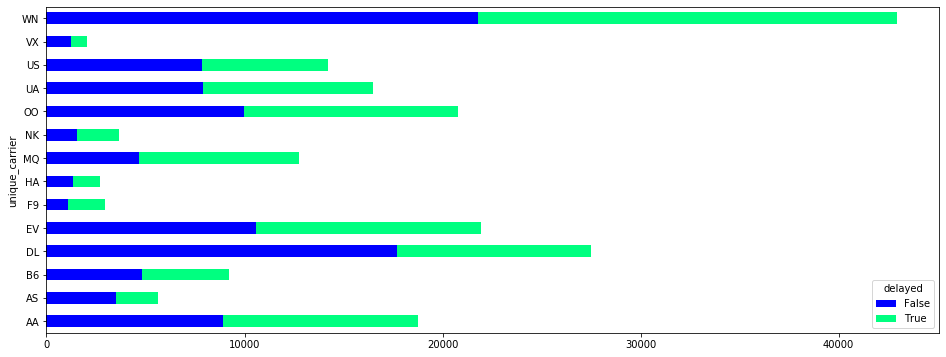

In [186]:
#这个时候我们可以进行画图去进行更直观的展示
import matplotlib.pyplot as plt
df_delay.plot(kind = 'barh', stacked = True, figsize = [16,6], colormap = 'winter')
plt.show()

### （5）透视表功能

In [187]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('usa_flights.csv')

flights_by_carrier = df.pivot_table(index = 'flight_date', columns = 'unique_carrier', values = 'flight_num', aggfunc = 'count')
flights_by_carrier.head()

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
02/01/2015 0:00,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
03/01/2015 0:00,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
04/01/2015 0:00,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403
05/01/2015 0:00,1532,433,754,2212,1811,264,209,1039,288,1737,1432,1157,174,3506
06/01/2015 0:00,1400,415,692,2054,1686,249,202,966,279,1527,1294,1003,152,3396
